In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
from sklearn import tree
from io import StringIO
import graphviz

In [3]:
pima = pd.read_excel(r'C:\Users\sithara\Desktop\Philanthrophy\File\Manage_v2.xlsx')

In [4]:
#Replace null values with 0
pima.fillna(0,inplace=True)

In [5]:
#create dummy for category variables
pima_onehot = pima.copy()
pima_onehot = pd.get_dummies (pima_onehot,columns=['FACULTY_STAFF_IND','MARITAL_STATUS','GENDER','STATE_CODE','ZIPCODE','STUDENT_ACTIVITY_PARTICIPANT','DEGREE_CODE1','SCHOOL1','DEGREE_CODE2','DEGREE_YEAR2','SCHOOL2','DEGREE_CODE3','DEGREE_YEAR3','SCHOOL3','DEGREE_CODE4','DEGREE_YEAR4','SCHOOL4','DONOR_CATEGORY','GIVING_SCHOOL_UNIT1','GIVING_SCHOOL_UNIT2','GIVING_SCHOOL_UNIT3'])
print(pima_onehot.head())

   ID_NUMBER  AGE_BRACKET  DEGREE_YEAR1  LIFETIME_RECOGNITION_AMT  \
0     109248           90          1953                   2470.00   
1      23841           70          1976                   1055.00   
2      52671           60          1981                    522.00   
3     159329           45          1992                     19.92   
4      52861           55          1983                    155.00   

   NO_YRS_GIVING  GIFT_AMOUNT_2018  GIFT_AMOUNT_2017  GIFT_AMOUNT_2016  \
0           34.0               0.0             300.0               0.0   
1           29.0               0.0               0.0               0.0   
2           23.0              25.0               0.0               0.0   
3            1.0               0.0               0.0               0.0   
4            2.0               0.0               0.0               0.0   

   GIFT_AMOUNT_2015  GIFT_AMOUNT_2014                 ...                   \
0             100.0             100.0                 ...     

In [6]:
predictor_cols=list(pima_onehot.columns.values[79:])
df = pd.DataFrame(pima,columns=['AGE_BRACKET','DEGREE_YEAR1','LIFETIME_RECOGNITION_AMT','NO_YRS_GIVING','LAST_GIFT_AMOUNT',
'FIRST_GIFT_AMOUNT','ENGAGEMENT_SCORE','NO_EVENTS_2018_NEW','NO_EVENTS_2017_NEW','NO_EVENTS_2016_NEW',
'NO_EVENTS_2015_NEW','NO_EVENTS_2014_NEW','NO_EVENTS_2013_NEW','NO_EVENTS_2012_NEW','NO_EVENTS_2011_NEW',
'NO_EVENTS_2010_NEW','NO_EVENTS_2009_NEW','NO_EVENTS_2008_NEW','GIFT_AMOUNT_2017_NEW',
'GIFT_AMOUNT_2016_NEW','GIFT_AMOUNT_2015_NEW','GIFT_AMOUNT_2014_NEW','GIFT_AMOUNT_2013_NEW','GIFT_AMOUNT_2012_NEW',
'GIFT_AMOUNT_2011_NEW','GIFT_AMOUNT_2010_NEW','GIFT_AMOUNT_2009_NEW','GIFT_AMOUNT_2008_NEW'])
numeric = list(df.columns.values[0:])
predictors=pima_onehot[predictor_cols+numeric]
target = pima_onehot['GIFT_AMOUNT_2018_NEW']

In [7]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors,target,test_size=.1)

In [8]:
pred_train.shape

(34932, 8607)

In [9]:
#decision tree regression (MSE) method
from sklearn.tree import DecisionTreeRegressor 
classifier = DecisionTreeRegressor(min_samples_split=15, min_samples_leaf=10)
classifier = classifier.fit(pred_train,tar_train)

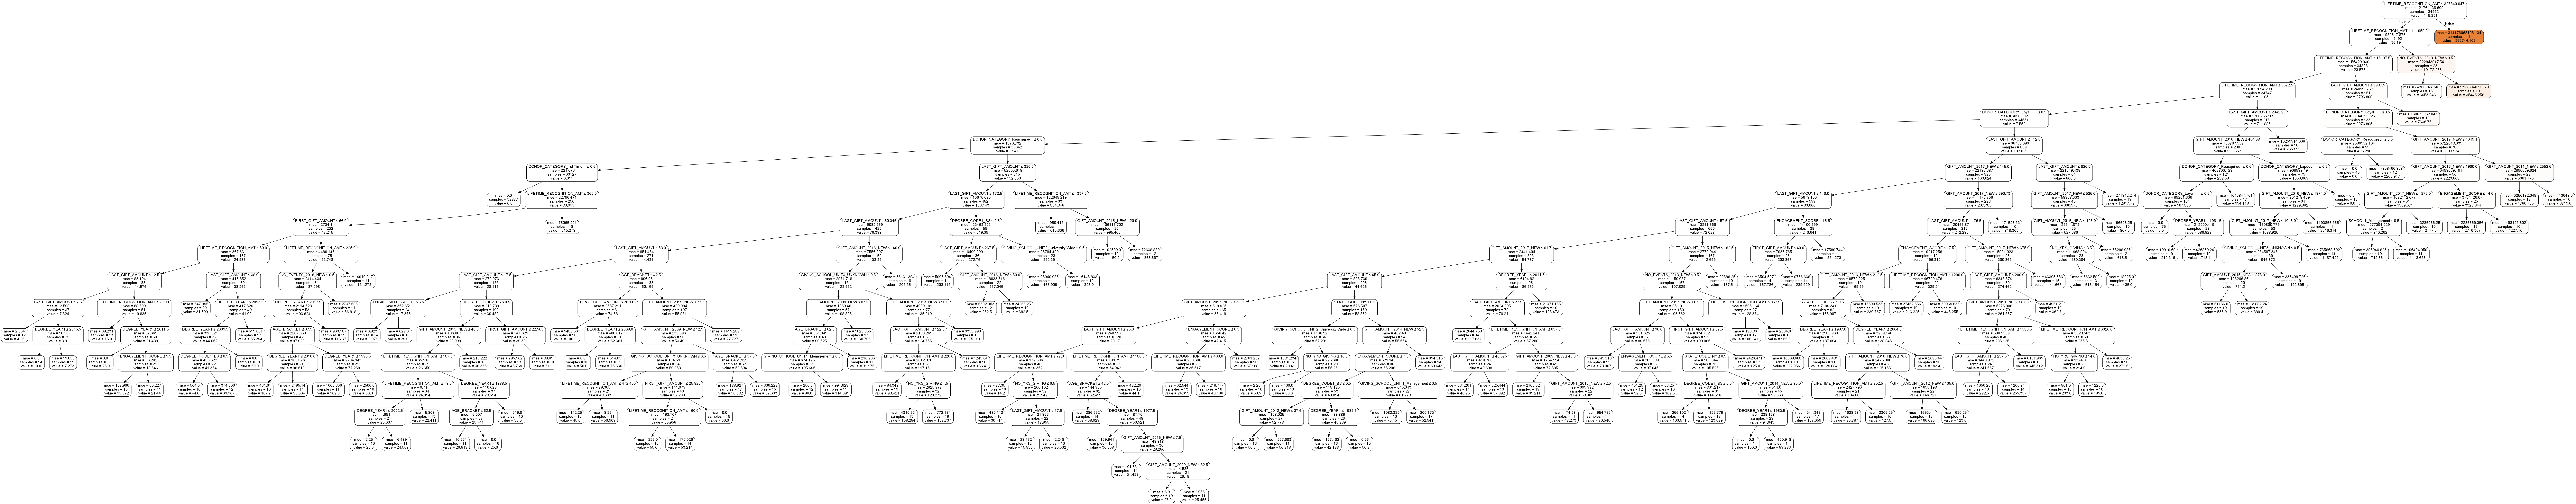

In [11]:
#Visualizing it at present
feature_names = predictors.columns
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [12]:
dot_data = tree.export_graphviz(classifier, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names 
                                #class_names=class_names
                               )
graph = graphviz.Source(dot_data)  
png_bytes = graph.pipe(format='png')
with open('D:/dtree_pipe.png','wb') as f:
    f.write(png_bytes)